# SVM 0n Social Dataset

## Import Libraries


In [7]:
import time
start = time.time()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Get the Data Set

Set index_col=0 to use the first column as the index.

In [8]:
df = pd.read_csv("Purchased_Dataset.csv")

x = df[['Age','EstimatedSalary']]
y = df['Purchased']


df.shape


(400, 5)

In [9]:
df.size

2000

In [10]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Train Test Split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=5)

# Feature Scaling

In [13]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# Fitting SVM to the Training set

In [14]:
import time
start = time.time()

from sklearn.svm import SVC
classifier= SVC(kernel = 'linear', random_state = 200)  #poly, rbf, sigmoid, precomputed, callable
classifier.fit(x_train, y_train)

end = time.time()
print('Time of Training the Algorithm in second',end - start)

Time of Training the Algorithm in second 0.6730058193206787


In [15]:
y_pred = classifier.predict(x_test)

In [16]:
#accuracy of he model
from sklearn.metrics import accuracy_score
print('Accuracy Score :', accuracy_score(y_test, y_pred))


Accuracy Score : 0.85


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        66
           1       0.81      0.74      0.77        34

    accuracy                           0.85       100
   macro avg       0.84      0.82      0.83       100
weighted avg       0.85      0.85      0.85       100



## Applying 10 fold cross validation

In [18]:

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X=x_train, y = y_train.ravel(), cv = 10)
mean_accuracy= accuracies.mean()*100
std_accuracy= accuracies.std()*100
print("The mean accuracy in %: ", accuracies.mean())
print("The standard deviation in % ", accuracies.std())
print("The accuracy of our model in % is betweeen {} and {}".format(mean_accuracy-std_accuracy, mean_accuracy+std_accuracy))

The mean accuracy in %:  0.829962921764924
The standard deviation in %  0.05265559379057914
The accuracy of our model in % is betweeen 77.73073279743448 and 88.26185155555032


In [19]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[60  6]
 [ 9 25]]


In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        66
           1       0.81      0.74      0.77        34

    accuracy                           0.85       100
   macro avg       0.84      0.82      0.83       100
weighted avg       0.85      0.85      0.85       100



# Standardize the Variables


In [21]:
dataset = pd.get_dummies(df, columns = ['Age'])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['EstimatedSalary']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [23]:
dataset.head()

,User ID,Gender,EstimatedSalary,Purchased,Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,...,Age_51,Age_52,Age_53,Age_54,Age_55,Age_56,Age_57,Age_58,Age_59,Age_60
0,15624510,Male,-1.490046,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15810944,Male,-1.460681,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15668575,Female,-0.785290,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15603246,Female,-0.374182,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15804002,Male,0.183751,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


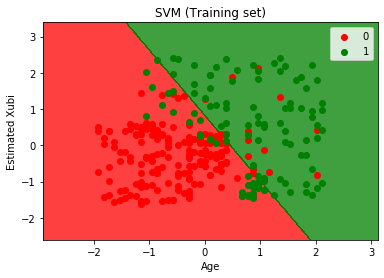

In [24]:

from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Xubi')
plt.legend()
plt.show()


## Visualising the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


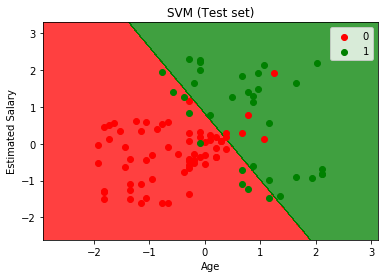

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Using Poly Kernel

In [42]:
from sklearn.svm import SVC
classifier= SVC(kernel = 'poly', random_state = 0)  #poly, rbf, sigmoid, precomputed, callable
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [43]:
#accuracy of he model
from sklearn.metrics import accuracy_score
print('Accuracy Score :', accuracy_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\n\n',classification_report(y_test, y_pred))

Accuracy Score : 0.88


               precision    recall  f1-score   support

           0       0.86      0.98      0.92        66
           1       0.96      0.68      0.79        34

    accuracy                           0.88       100
   macro avg       0.91      0.83      0.85       100
weighted avg       0.89      0.88      0.87       100



### Visualising the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


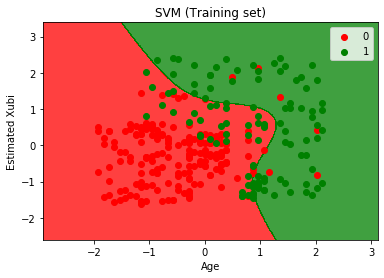

In [44]:

from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Xubi')
plt.legend()
plt.show()